In [ ]:
# import json
# import pandas as pd

# # Charger le fichier JSON
# with open('data/pistes_lyon/allee-de-la-belle-etoile.json', 'r') as file:
#     data = json.load(file)

# # Extraire les informations générales
# general_info = {
#     'name': data['name'],
#     'description': data['description'],
#     'arrondissement': data['arrondissement'],
#     'idPdc': data['idPdc'],
#     'longitude': data['coordinates'][0],
#     'latitude': data['coordinates'][1]
# }

# # Créer un dictionnaire pour stocker les comptes mensuels
# monthly_counts = {}
# for count in data['counts']:
#     monthly_counts[count['month']] = count['count']

# # Combiner les informations générales et les comptes mensuels
# row = {**general_info, **monthly_counts}

# # Convertir en DataFrame pandas
# df = pd.DataFrame([row])

# # Réorganiser les colonnes
# columns_order = ['name', 'description', 'arrondissement', 'idPdc', 'longitude', 'latitude'] + sorted(monthly_counts.keys())
# df = df[columns_order]

# # Sauvegarder en CSV
# df.to_csv('allee-de-la-belle-etoile.csv', index=False)

# print("Le fichier CSV a été créé avec succès.")

# # Afficher les premières colonnes et les dernières colonnes pour vérification
# print("\nAperçu des colonnes:")
# print(df.columns[:6].tolist() + ['...'] + df.columns[-5:].tolist())

In [ ]:
import geopandas as gpd

# Charger le fichier GeoJSON dans un GeoDataFrame
gdf = gpd.read_file('path/to/your/file.geojson')

# Si tu veux conserver uniquement les attributs sans les géométries, tu peux utiliser :
df = gdf.drop(columns='geometry')

# Exporter le DataFrame en CSV
df.to_csv('output_file.csv', index=False)


In [ ]:
import json
import pandas as pd
import os

# Initialiser une liste pour stocker les données de chaque fichier
data_list = []

# Parcourir tous les fichiers dans le dossier 'pistes_lyon'
folder_path = 'data/pistes_lyon'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        # Charger le fichier JSON
        with open(os.path.join(folder_path, filename), 'r') as file:
            data = json.load(file)

        # Extraire les informations générales
        general_info = {
            'name': data['name'],
            'description': data['description'],
            'arrondissement': data['arrondissement'],
            'idPdc': data['idPdc'],
            'longitude': data['coordinates'][0],
            'latitude': data['coordinates'][1]
        }

        # Créer un dictionnaire pour stocker les comptes mensuels
        monthly_counts = {}
        for count in data['counts']:
            monthly_counts[count['month']] = count['count']

        # Combiner les informations générales et les comptes mensuels
        row = {**general_info, **monthly_counts}

        # Ajouter la ligne à la liste
        data_list.append(row)

# Convertir la liste en DataFrame pandas
df = pd.DataFrame(data_list)

# Réorganiser les colonnes : informations générales + les mois triés
columns_order = ['name', 'description', 'arrondissement', 'idPdc', 'longitude', 'latitude'] + sorted(df.columns.difference(['name', 'description', 'arrondissement', 'idPdc', 'longitude', 'latitude']))
df = df[columns_order]

# Sauvegarder en CSV
output_csv = 'pistes_lyon_combined.csv'
df.to_csv(output_csv, index=False)

print(f"Le fichier CSV '{output_csv}' a été créé avec succès.")

# Afficher les premières colonnes et les dernières colonnes pour vérification
print("\nAperçu des colonnes:")
print(df.columns[:6].tolist() + ['...'] + df.columns[-5:].tolist())


In [ ]:
# pip install ydata-profiling

In [ ]:
import pandas as pd
import json

# Charger le fichier JSON
with open('metropole-de-lyon_pvo_patrimoine_voirie.pvoamenagementcyclable.json') as f:
    data = json.load(f)
print(data)

# Normaliser les données si elles sont imbriquées
df = pd.json_normalize(data)
df


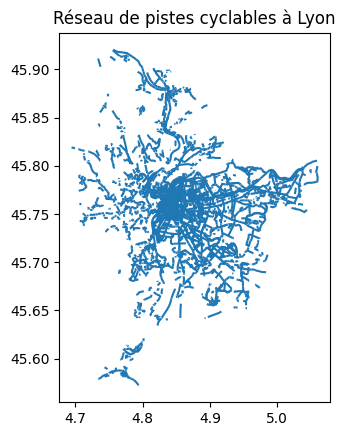

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le GeoJSON dans un GeoDataFrame
gdf = gpd.read_file('metropole-de-lyon_pvo_patrimoine_voirie.pvoamenagementcyclable.geojson')

# Tracer la carte avec Matplotlib
gdf.plot()

# Ajouter des titres ou ajuster le style si besoin
plt.title("Réseau de pistes cyclables à Lyon")
plt.show()


In [ ]:
import folium

# Créer une carte centrée sur Lyon
map_lyon = folium.Map(location=[45.75, 4.85], zoom_start=13)

# Charger ton GeoJSON et l'ajouter à la carte
folium.GeoJson('metropole-de-lyon_pvo_patrimoine_voirie.pvoamenagementcyclable.json').add_to(map_lyon)

# Afficher la carte
map_lyon